# Unstructured
- https://unstructured.io/
- https://unstructured-io.github.io/unstructured/index.html
- https://docs.unstructured.io/api-reference/api-services/python-sdk


## Setup

In [1]:
# %%capture
# %pip install "unstructured[all-docs]" unstructured-client watermark

In [2]:
# # Warning control
# import warnings
# warnings.filterwarnings('ignore')

In [1]:
from IPython.display import JSON

import json

from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import dict_to_elements, elements_to_json

c:\Users\Hemant.Singhsidar\Desktop\CodeSpace\.env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
%load_ext watermark

In [2]:
import unstructured

In [ ]:
%watermark --iversions

## Initial exploration ( extract elements)

In [ ]:
import unstructured.partition

help(unstructured.partition)

In [4]:
from unstructured.partition.pdf import partition_pdf

# Specify the path to your PDF file
filename = "PDF STORE/2501.00663v1.pdf"

# Call the partition_pdf function
# Returns a List[Element] present in the pages of the parsed pdf document
elements = partition_pdf(filename)

# Now, elements is a list of all elements present in the pages of the parsed pdf document

c:\Users\Hemant.Singhsidar\Desktop\CodeSpace\.env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### We don't see `Image`, image information is not extracted as we expected, lets use different strategy.

### Image extraction from PDF
- Now let’s say that your PDF has tables and let’s say you want to preserve the image data. 
- You will have to specify the [strategy](https://unstructured-io.github.io/unstructured/best_practices/strategies.html) parameter as `hi_res`. This will use a combination of computer vision and Optical Character Recognition (OCR) to extract the tables and maintain the structure. 

> Note: For even better image extraction Unstructured offers an API that improves upon the existing open source models.

> Depending upon machine, you might face different module / library issues, these links might help
- https://stackoverflow.com/questions/59690698/modulenotfounderror-no-module-named-lzma-when-building-python-using-pyenv-on
- https://unstructured-io.github.io/unstructured/installation/full_installation.html

In [10]:
from unstructured.partition.pdf import partition_pdf

elements = partition_pdf(filename=filename,
                     strategy='hi_res',
           )

In [11]:
import json
element_dict = [el.to_dict() for el in elements]
output = json.dumps(element_dict, indent=2)
unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'Header', 'FigureCaption', 'ListItem', 'UncategorizedText', 'Image', 'NarrativeText', 'Formula', 'Table', 'Title'}


In [12]:
images = [el for el in elements if el.category == "Image"]

# print(images[2].text)
# print(images[2].metadata.text_as_html)

In [13]:
images

In [14]:
len(images)

14

## Another way ( extract / display images + elements )

In [16]:
# Get elements
path = "images"
raw_pdf_elements = partition_pdf(filename=filename,
                                 # Unstructured first finds embedded image blocks
                                 # Only applicable if `strategy=hi_res`
                                 extract_images_in_pdf=True,
                                 strategy = "hi_res",
                                 infer_table_structure=True,
                                 # Only applicable if `strategy=hi_res`
                                 extract_image_block_output_dir = path,
                                 )

In [17]:
element_dict = [el.to_dict() for el in raw_pdf_elements]


unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(output)
print(unique_types)

[
  {
    "type": "UncategorizedText",
    "element_id": "ae76beb8b6ba3840cf7c218ebd451188",
    "text": "4",
    "metadata": {
      "coordinates": {
        "points": [
          [
            45.388888888888886,
            583.4999999999998
          ],
          [
            45.388888888888886,
            611.2777777777776
          ],
          [
            100.94444444444446,
            611.2777777777776
          ],
          [
            100.94444444444446,
            583.4999999999998
          ]
        ],
        "system": "PixelSpace",
        "layout_width": 1700,
        "layout_height": 2200
      },
      "last_modified": "2025-01-25T14:52:27",
      "filetype": "application/pdf",
      "languages": [
        "eng"
      ],
      "page_number": 1,
      "file_directory": "PDF STORE",
      "filename": "2501.00663v1.pdf"
    }
  },
  {
    "type": "UncategorizedText",
    "element_id": "3b3b7b2f2b303144b9b46b127b608af2",
    "text": "2024",
    "metadata": {
     

In [18]:
element_dict

[{'type': 'UncategorizedText',
  'element_id': 'ae76beb8b6ba3840cf7c218ebd451188',
  'text': '4',
  'metadata': {'coordinates': {'points': ((45.388888888888886,
      583.4999999999998),
     (45.388888888888886, 611.2777777777776),
     (100.94444444444446, 611.2777777777776),
     (100.94444444444446, 583.4999999999998)),
    'system': 'PixelSpace',
    'layout_width': 1700,
    'layout_height': 2200},
   'last_modified': '2025-01-25T14:52:27',
   'filetype': 'application/pdf',
   'languages': ['eng'],
   'page_number': 1,
   'file_directory': 'PDF STORE',
   'filename': '2501.00663v1.pdf'}},
 {'type': 'UncategorizedText',
  'element_id': '3b3b7b2f2b303144b9b46b127b608af2',
  'text': '2024',
  'metadata': {'coordinates': {'points': ((51.0, 585.0),
     (51.0, 692.0),
     (88.0, 692.0),
     (88.0, 585.0)),
    'system': 'PixelSpace',
    'layout_width': 1700,
    'layout_height': 2200},
   'last_modified': '2025-01-25T14:52:27',
   'filetype': 'application/pdf',
   'languages': ['en

In [19]:
images = [el for el in raw_pdf_elements if el.category == "Image"]

# print(images[5].text)
# print(images[5].metadata.text_as_html)

### Let's display the images extracted

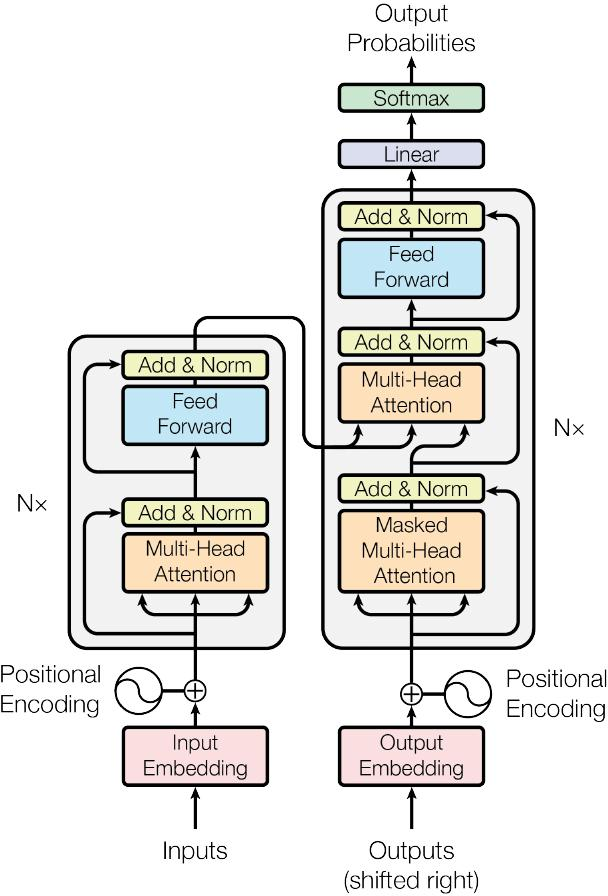

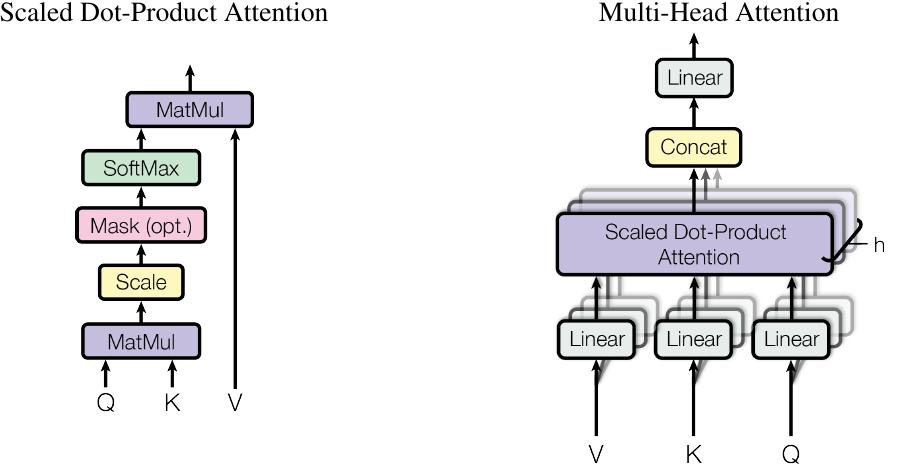

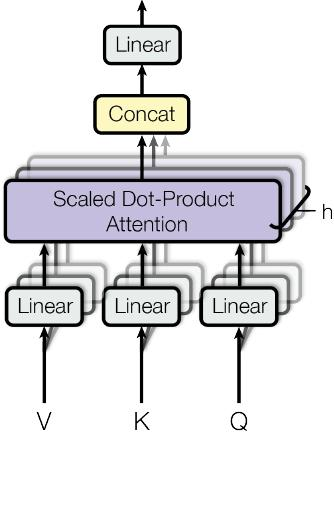

In [15]:
from IPython.display import Image, display
import glob

# Define the path to the folder containing the images
folder_path = "images/*.jpg"  # Update the file type as needed

# Use glob to search for JPG files in the specified folder
image_files = glob.glob(folder_path)

# Iterate through the list of image files and display each image inline
for image_file in image_files:
    display(Image(filename=image_file))

In [ ]:
import PIL
print(PIL.__version__)

In [ ]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./images/figure-3-1.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)